# Task 3: Part 1 Covid-19 data trend analysis for New York

The first thing we will do is to import the team_merged.csv we will be using for the analysis. This contains the Covid-19 cases, deaths, and population data for the United States that we generated in our previous team activity.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

team_merged = pd.read_csv("../../../../src/team/stage_1/merged_covid19.csv")
team_merged

,UID,countyFIPS_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-24_cases,2020-01-26_cases,2020-01-27_cases,2020-01-29_cases,2020-01-31_cases,...,2021-08-09_deaths,2021-08-10_deaths,2021-08-11_deaths,2021-08-12_deaths,2021-08-13_deaths,2021-08-14_deaths,2021-08-15_deaths,2021-08-16_deaths,County Name,population
0,1001AL,1001,AL,1,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,Autauga County,55869
1,1003AL,1003,AL,1,0,0,0,0,0,0,...,330,332,338,342,344,344,344,347,Baldwin County,223234
2,1005AL,1005,AL,1,0,0,0,0,0,0,...,63,63,64,64,65,65,65,65,Barbour County,24686
3,1007AL,1007,AL,1,0,0,0,0,0,0,...,66,66,67,67,67,67,67,67,Bibb County,22394
4,1009AL,1009,AL,1,0,0,0,0,0,0,...,140,140,140,140,140,140,140,141,Blount County,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037WY,56037,WY,56,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,Sweetwater County,42343
3138,56039WY,56039,WY,56,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,Teton County,23464
3139,56041WY,56041,WY,56,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,Uinta County,20226
3140,56043WY,56043,WY,56,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,Washakie County,7805


Next we will use a mask to generate a new dataframe containing only data from New York.

In [2]:
new_york =  team_merged[team_merged["State_cases"].map(lambda State_cases: "NY" in State_cases)]
new_york

,UID,countyFIPS_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-24_cases,2020-01-26_cases,2020-01-27_cases,2020-01-29_cases,2020-01-31_cases,...,2021-08-09_deaths,2021-08-10_deaths,2021-08-11_deaths,2021-08-12_deaths,2021-08-13_deaths,2021-08-14_deaths,2021-08-15_deaths,2021-08-16_deaths,County Name,population
1828,36001NY,36001,NY,36,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,Albany County,305506
1829,36003NY,36003,NY,36,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,Allegany County,46091
1830,36005NY,36005,NY,36,0,0,0,0,0,0,...,6592,6592,6596,6596,6597,6597,6597,6599,Bronx County,1418207
1831,36007NY,36007,NY,36,0,0,0,0,0,0,...,367,367,368,368,369,369,369,369,Broome County,190488
1832,36009NY,36009,NY,36,0,0,0,0,0,0,...,93,93,93,93,94,94,94,94,Cattaraugus County,76117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,36115NY,36115,NY,36,0,0,0,0,0,0,...,56,56,56,56,56,56,56,56,Washington County,61204
1886,36117NY,36117,NY,36,0,0,0,0,0,0,...,73,73,73,73,73,73,73,73,Wayne County,89918
1887,36119NY,36119,NY,36,0,0,0,0,0,0,...,2298,2298,2298,2298,2300,2300,2300,2301,Westchester County,967506
1888,36121NY,36121,NY,36,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,Wyoming County,39859


Next we grab the total number of deaths for each of the last seven days that were recorded. I refer to the first day as tuesday
because that is the day of the week that particular day fell on. After grabbing that data I sum each day for easier comparison.

In [24]:
ny_start_deaths = new_york['2021-08-09_deaths'].sum()
ny_total_deaths = ny_start_deaths
ny_t_deaths = new_york['2021-08-10_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_t_deaths
ny_w_deaths = new_york['2021-08-11_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_w_deaths
ny_th_deaths = new_york['2021-08-12_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_th_deaths
ny_f_deaths = new_york['2021-08-13_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_f_deaths
ny_sa_deaths = new_york['2021-08-14_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_sa_deaths
ny_su_deaths = new_york['2021-08-15_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_su_deaths
ny_m_deaths = new_york['2021-08-16_deaths'].sum() - ny_total_deaths
ny_total_deaths += ny_m_deaths


ny_total_deaths = ny_total_deaths - ny_start_deaths

Next we do the same for Covid-19 cases.

In [25]:
ny_start_cases = new_york['2021-08-09_cases'].sum()
ny_total_cases = ny_start_cases
ny_t_cases = new_york['2021-08-10_cases'].sum() - ny_total_cases
ny_total_cases += ny_t_cases
ny_w_cases = new_york['2021-08-11_cases'].sum() - ny_total_cases
ny_total_cases += ny_w_cases
ny_th_cases = new_york['2021-08-12_cases'].sum() - ny_total_cases
ny_total_cases += ny_th_cases
ny_f_cases = new_york['2021-08-13_cases'].sum() - ny_total_cases
ny_total_cases += ny_f_cases
ny_sa_cases = new_york['2021-08-14_cases'].sum() - ny_total_cases
ny_total_cases += ny_sa_cases
ny_su_cases = new_york['2021-08-15_cases'].sum() - ny_total_cases
ny_total_cases += ny_su_cases
ny_m_cases = new_york['2021-08-16_cases'].sum() - ny_total_cases
ny_total_cases = ny_total_cases - ny_start_cases

Here we create a new dataframe to display the data organized by day of the week for the columns and cases and deaths for the 
two rows.

In [26]:
ny_data = {'Tuesday': [ny_t_cases,ny_t_deaths], 'Wednesday': [ny_w_cases, ny_w_deaths], 'Thursday':[ny_th_cases,ny_th_deaths],
          'Friday': [ny_f_cases,ny_f_deaths], 'Saturday': [ny_sa_cases, ny_sa_deaths], 'Sunday':[ny_su_cases,ny_su_deaths],
          'Monday':[ny_m_cases,ny_m_deaths], 'total':[ny_total_cases,ny_total_deaths]}
ny_data_last_week = pd.DataFrame(data=ny_data, index = ['new cases','new deaths'])
ny_data_last_week

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,total
new cases,3222,4150,4701,4591,0,8953,3575,25617
new deaths,8,36,0,43,0,0,41,128


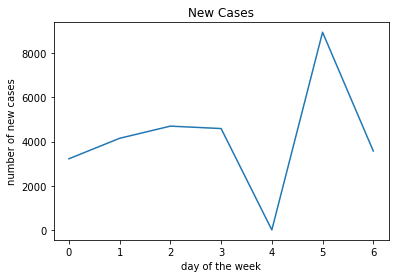

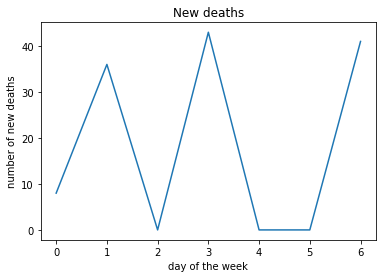

In [23]:
plt.title('New Cases')
plt.plot([ny_t_cases, ny_w_cases, ny_th_cases, ny_f_cases, ny_sa_cases, ny_su_cases, ny_m_cases])
plt.ylabel('number of new cases')
plt.xlabel('day of the week')
plt.show()

plt.title('New deaths')
plt.plot([ny_t_deaths, ny_w_deaths, ny_th_deaths, ny_f_deaths, ny_sa_deaths, ny_su_deaths, ny_m_deaths])
plt.ylabel('number of new deaths')
plt.xlabel('day of the week')
plt.show()

## Data Analysis:

The data indicates that cases are trending upwards and deaths are fluctuating rapidly but staying within a set range of 0 to 45 in the state of New York. The number of cases increased from that tuesday to the following monday by 25,970, deaths increased by 128 during that same time span.


# Task 3: Part 2 Enrichment data

## Presidential Elections by county

First we will read in the presidential election information.

Each student member creates notebooks to read the Enrichment data and displays them on a notebook.
Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [7]:
politics = pd.read_csv("../../../../data/stage_1/president_county_candidate.csv")
politics

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In the next step we create a map to add state abbreviations to the data which we will use to merge later.

In [8]:
state_mask = {'Alabama':'AL','Kentucky':'KY','Ohio':'OH','Alaska':'AK','Louisiana':'LA','Oklahoma':'OK','Arizona':'AZ',
              'Maine':'ME','Oregon':'OR','Arkansas':'AR','Maryland':'MD','Pennsylvania':'PA','Massachusetts':'MA',
              'California':'CA','Michigan':'MI','Rhode Island':'RI','Colorado':'CO','Minnesota':'MN','South Carolina':'SC',
              'Connecticut':'CT','Mississippi':'MS','South Dakota':'SD','Delaware':'DE','Missouri':'MO','Tennessee':'TN',
              'District of Columbia':'DC','Montana':'MT','Texas':'TX','Florida':'FL','Nebraska':'NE','Georgia':'GA',
              'Nevada':'NV','Utah':'UT','Guam':'GU','New Hampshire':'NH','Vermont':'VT','Hawaii':'HI','New Jersey':'NJ',
              'Virginia':'VA','Idaho':'ID','New Mexico':'NM','Illinois':'IL','New York':'NY','Washington':'WA','Indiana':'IN',
              'North Carolina':'NC','West Virginia':'WV','Iowa':'IA','North Dakota':'ND','Wisconsin':'WI','Kansas':'KS',
              'Wyoming':'WY'}

politics['state_abbrev'] = politics['state'].map(state_mask)

Here we continue to rename certain columns in the data to allow more clarity and easier merging.

In [9]:
politics = politics.rename(columns = {'county':'County_Name'})
team_merged = team_merged.rename(columns = {'County Name': 'County_Name','State_cases':'state_abbrev'})
politics

,state,County_Name,candidate,party,total_votes,won,state_abbrev
0,Delaware,Kent County,Joe Biden,DEM,44552,True,DE
1,Delaware,Kent County,Donald Trump,REP,41009,False,DE
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,DE
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,DE
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,DE
...,...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False,AZ
32173,Arizona,Mohave County,Donald Trump,REP,78535,True,AZ
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False,AZ
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False,AZ


In [10]:
team_merged

,UID,countyFIPS_cases,state_abbrev,StateFIPS_cases,2020-01-22_cases,2020-01-24_cases,2020-01-26_cases,2020-01-27_cases,2020-01-29_cases,2020-01-31_cases,...,2021-08-09_deaths,2021-08-10_deaths,2021-08-11_deaths,2021-08-12_deaths,2021-08-13_deaths,2021-08-14_deaths,2021-08-15_deaths,2021-08-16_deaths,County_Name,population
0,1001AL,1001,AL,1,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,Autauga County,55869
1,1003AL,1003,AL,1,0,0,0,0,0,0,...,330,332,338,342,344,344,344,347,Baldwin County,223234
2,1005AL,1005,AL,1,0,0,0,0,0,0,...,63,63,64,64,65,65,65,65,Barbour County,24686
3,1007AL,1007,AL,1,0,0,0,0,0,0,...,66,66,67,67,67,67,67,67,Bibb County,22394
4,1009AL,1009,AL,1,0,0,0,0,0,0,...,140,140,140,140,140,140,140,141,Blount County,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037WY,56037,WY,56,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,Sweetwater County,42343
3138,56039WY,56039,WY,56,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,Teton County,23464
3139,56041WY,56041,WY,56,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,Uinta County,20226
3140,56043WY,56043,WY,56,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,Washakie County,7805


Here we set our indices and unstack the political parties to clarify the data for Presidential elections by county. We then use the groupby function to get rid of needless rows.

In [11]:
politics_index = politics.set_index(['state','County_Name','state_abbrev','party'], append=True)
pol_wide = politics_index['total_votes'].unstack('party')
pol_final = pol_wide.groupby(['state','state_abbrev','County_Name']).first()
pol_final

party                                   ALI  APV  ASP  BAR  BFP  BMP  CST  \
state   state_abbrev County_Name                                            
Alabama AL           Autauga County     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Baldwin County     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Barbour County     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Bibb County        NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Blount County      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                                     ...  ...  ...  ...  ...  ...  ...   
Wyoming WY           Sweetwater County  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Teton County       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Uinta County       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Washakie County    NaN  NaN  NaN  NaN  NaN  NaN  NaN   
                     Weston County      NaN  NaN  NaN  NaN  NaN  NaN  NaN   

party                                       DEM  GOP  GRN  ...  OTH  PRG  PRO  \
state   state_abbrev County_Name                           ...                  
Alabama AL           Autauga County      7503.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Baldwin County     24578.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Barbour County      4816.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Bibb County         1986.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Blount County       2640.0  NaN  NaN  ...  NaN  NaN  NaN   
...                                         ...  ...  ...  ...  ...  ...  ...   
Wyoming WY           Sweetwater County   3823.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Teton County        9848.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Uinta County        1591.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Washakie County      651.0  NaN  NaN  ...  NaN  NaN  NaN   
                     Weston County        360.0  NaN  NaN  ...  NaN  NaN  NaN   

party                                   PSL      REP  SEP  SWP  UNA  UTY  \
state   state_abbrev County_Name                                           
Alabama AL           Autauga County     NaN  19838.0  NaN  NaN  NaN  NaN   
                     Baldwin County     NaN  83544.0  NaN  NaN  NaN  NaN   
                     Barbour County     NaN   5622.0  NaN  NaN  NaN  NaN   
                     Bibb County        NaN   7525.0  NaN  NaN  NaN  NaN   
                     Blount County      NaN  24711.0  NaN  NaN  NaN  NaN   
...                                     ...      ...  ...  ...  ...  ...   
Wyoming WY           Sweetwater County  NaN  12229.0  NaN  NaN  NaN  NaN   
                     Teton County       NaN   4341.0  NaN  NaN  NaN  NaN   
                     Uinta County       NaN   7496.0  NaN  NaN  NaN  NaN   
                     Washakie County    NaN   3245.0  NaN  NaN  NaN  NaN   
                     Weston County      NaN   3107.0  NaN  NaN  NaN  NaN   

party                                     WRI  
state   state_abbrev County_Name               
Alabama AL           Autauga County      79.0  
                     Baldwin County     328.0  
                     Barbour County      12.0  
                     Bibb County         10.0  
                     Blount County       28.0  
...                                       ...  
Wyoming WY           Sweetwater County   83.0  
                     Teton County       144.0  
                     Uinta County        64.0  
                     Washakie County     19.0  
                     Weston County        9.0  

[4633 rows x 26 columns]

Here we merge the two data sets on the 'state_abbrev' and 'County_Name' columns.

In [12]:
politics_merged = pd.merge(pol_final, team_merged, on = ['state_abbrev','County_Name'])
politics_merged

,state_abbrev,County_Name,ALI,APV,ASP,BAR,BFP,BMP,CST,DEM,...,2021-08-08_deaths,2021-08-09_deaths,2021-08-10_deaths,2021-08-11_deaths,2021-08-12_deaths,2021-08-13_deaths,2021-08-14_deaths,2021-08-15_deaths,2021-08-16_deaths,population
0,AL,Autauga County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7503.0,...,114,114,114,114,114,114,114,114,114,55869
1,AL,Baldwin County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24578.0,...,330,330,332,338,342,344,344,344,347,223234
2,AL,Barbour County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4816.0,...,63,63,63,64,64,65,65,65,65,24686
3,AL,Bibb County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,...,66,66,66,67,67,67,67,67,67,22394
4,AL,Blount County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2640.0,...,140,140,140,140,140,140,140,140,141,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,WY,Sweetwater County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3823.0,...,45,45,45,45,45,45,45,45,45,42343
3018,WY,Teton County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9848.0,...,11,11,11,11,11,11,11,11,11,23464
3019,WY,Uinta County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591.0,...,14,14,14,14,14,14,14,14,14,20226
3020,WY,Washakie County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.0,...,26,26,26,26,26,26,26,26,26,7805


Finally we output the newly merged CSV.

In [13]:
politics_merged.to_csv('pol_final_merge.csv')